**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

**Reading the data**

In [ ]:
matches=pd.read_csv("/content/drive/MyDrive/matches.csv")

**Null values in the dataset**

In [ ]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**Dropping columns with Nan values**

In [ ]:
matches.drop(['umpire3'],axis='columns',inplace=True)

**Filling null values of city column based on venue**

In [ ]:
matches['city'].fillna(matches['venue'],inplace=True)

**Removing rows in which winner, umpire1, umpire2 values are missing**

In [ ]:
matches=matches[matches["winner"].notna()]

In [ ]:
matches=matches[matches["umpire1"].notna()]
matches=matches[matches["umpire2"].notna()]

**Replacing two teams having same name with one name**

In [ ]:
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

**Replacing string values with numeric values**

In [ ]:
encoder=LabelEncoder()

In [ ]:
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

**Introducing new columns(team1_win,team1_toss_win,team1_bat) helpful in prediction**

In [ ]:
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,11,0,7,SPD Smith,21,A Nand Kishore,S Ravi,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,7,0,10,CA Lynn,31,Nitin Menon,CK Nandan,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,5,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,0.0,0.0,0
5,6,2017,Hyderabad,2017-04-09,4,13,13,field,normal,0,13,0,9,Rashid Khan,28,A Deshmukh,NJ Llong,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,0,5,5,field,normal,0,5,0,6,KL Rahul,14,KN Ananthapadmanabhan,C Shamshuddin,0.0,0.0,0
751,11347,2019,Mumbai,05/05/19,7,8,8,field,normal,0,8,0,9,HH Pandya,40,Nanda Kishore,O Nandan,0.0,0.0,0
752,11412,2019,Chennai,07/05/19,0,8,0,bat,normal,0,8,0,6,AS Yadav,18,Nigel Llong,Nitin Menon,0.0,1.0,1
754,11414,2019,Visakhapatnam,10/05/19,2,0,0,field,normal,0,0,0,6,F du Plessis,0,Sundaram Ravi,Bruce Oxenford,0.0,0.0,0


**Removing highly correlated features**

In [ ]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
5,4,13,0.0,0.0,28
...,...,...,...,...,...
750,0,5,0.0,0.0,14
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
754,2,0,0.0,0.0,0


In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,28,AY Dandekar,NJ Llong,1.0,0.0,0
1,2,2017,Pune,2017-04-06,8,11,11,field,normal,0,11,0,7,SPD Smith,21,A Nand Kishore,S Ravi,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,4,7,7,field,normal,0,7,0,10,CA Lynn,31,Nitin Menon,CK Nandan,0.0,0.0,0
3,4,2017,Indore,2017-04-08,11,5,5,field,normal,0,5,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,0.0,0.0,0
5,6,2017,Hyderabad,2017-04-09,4,13,13,field,normal,0,13,0,9,Rashid Khan,28,A Deshmukh,NJ Llong,0.0,0.0,0


**Splitting the data into testing and training data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prediction_df,matches['winner'],test_size=0.2, random_state=0,shuffle=True)


**Prediction using SVC**

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)*100))

Accuracy of SVM Classifier on test set: 38.6667


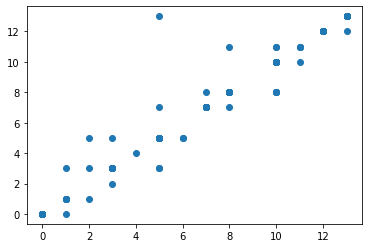

In [ ]:
plt.scatter(y_test,y_pred)

**Prediction using Random Forest Classifier**

In [ ]:
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred1 = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)*100))

Accuracy of Random Forest Classifier on test set: 85.3333


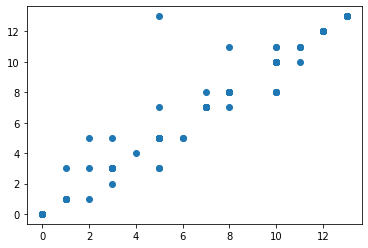

In [ ]:
plt.scatter(y_test,y_pred1)

**Prediction using Decision Tree Classifier**

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred2 = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)*100))

Accuracy of Decision Tree Classifier on test set: 98.6667


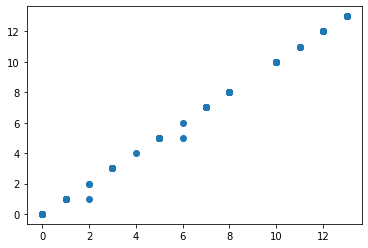

In [ ]:
plt.scatter(y_test,y_pred2)